In [1]:
import pandas as pd # Data Processing
import numpy as np # Linear Algebra

# Importing libraries for Data-Visualization
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.svm import SVC # Importing SVM

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import LabelEncoder # One-Hot Encoding
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires.csv


In [4]:
data=pd.read_csv("forestfires.csv")

In [5]:
data.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
data.sample(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
216,sep,sun,92.4,124.1,680.7,8.5,16.9,60,1.3,0.0,...,0,0,0,0,0,0,0,0,1,large
10,sep,sat,92.5,88.0,698.6,7.1,17.8,51,7.2,0.0,...,0,0,0,0,0,0,0,0,1,small
196,apr,thu,81.5,9.1,55.2,2.7,5.8,54,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large


In [7]:
# Description of the DataFrame.

data.iloc[:,2:11].describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [8]:
# Correlation matrix

data.iloc[:,2:11].corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


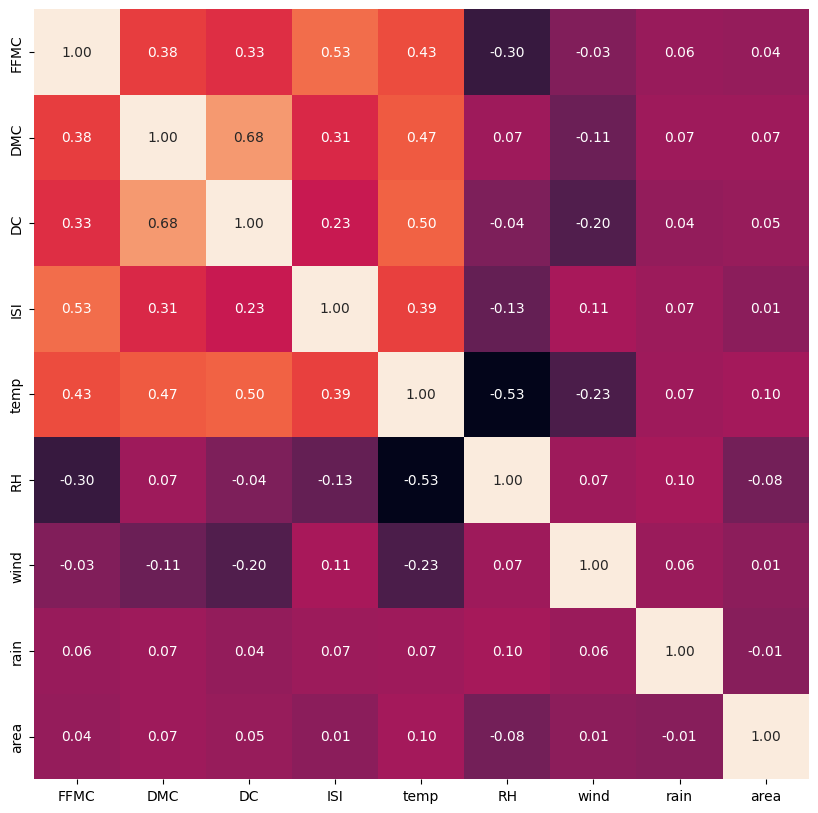

In [9]:
# Heatmap of correlation Matrix

plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(data.iloc[:,2:11].corr(),annot=True,fmt='.2f',cbar=False)
plt.show()

>***From the above Heatmap we can see that the area of forest burnt is related to temperature, higher the temperature more are the incidents of forest fires. Area of forest burnt is in negative correlation with Relative Humidity (RH), where relative humidity is density of water in space relative to the temperature in the same space. Thus, more the relative humidity lesser are the incidents of forest fires and hence less will be the area incinerated.***


In [10]:
# The Pearson correlation coefficient of area with other features.

data.iloc[:,2:11].corr()['area'].sort_values(ascending=False)

area    1.000000
temp    0.097844
DMC     0.072994
DC      0.049383
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

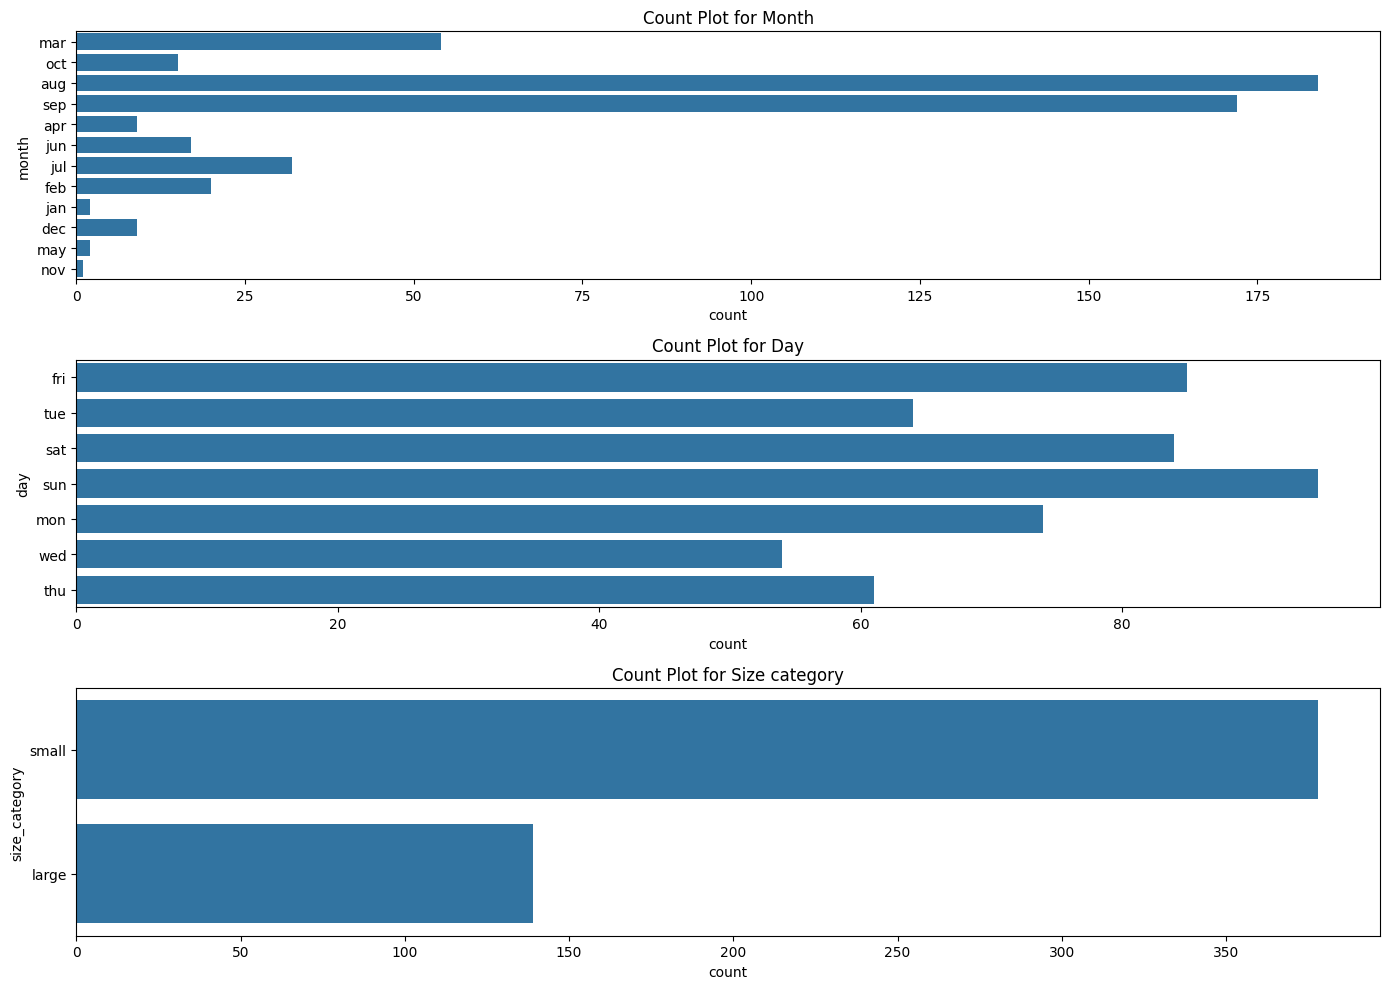

In [11]:
# Different countplots

fig,ax=plt.subplots(3,1,figsize=(14,10))
sns.countplot(data.month,ax=ax[0])
ax[0].set_title('Count Plot for Month')

sns.countplot(data.day,ax=ax[1])
ax[1].set_title('Count Plot for Day')

sns.countplot(data.size_category,ax=ax[2])
ax[2].set_title('Count Plot for Size category')

plt.tight_layout()
plt.show()

**`From the first plot we can see that the incidence of forest fires was more in the months of August and September. And in second plot we can see that for three days in a week the incidences were reported. In the third plot we can concluded that the area clutched due to forest fires is small in most of the cases.`**

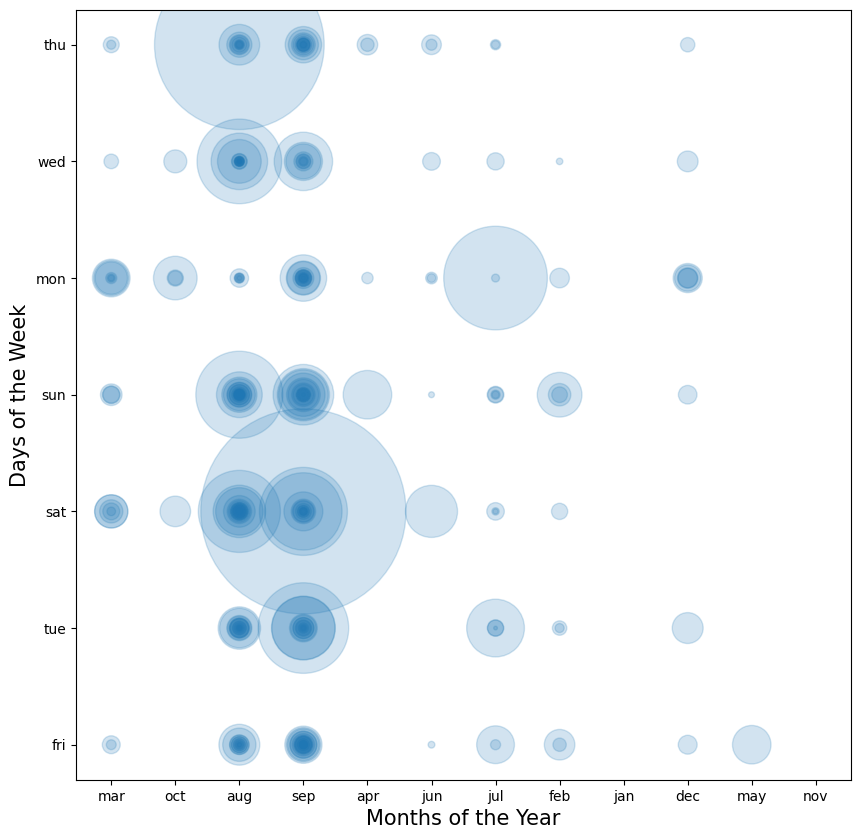

In [12]:
data.plot(kind='scatter',x='month',y='day',alpha=0.2,s=20*data['area'])
plt.xlabel("Months of the Year",fontsize=15)
plt.ylabel("Days of the Week",fontsize=15)
plt.show()

Skewness = 12.846933533934868
Kurtosis = 194.1407210942299


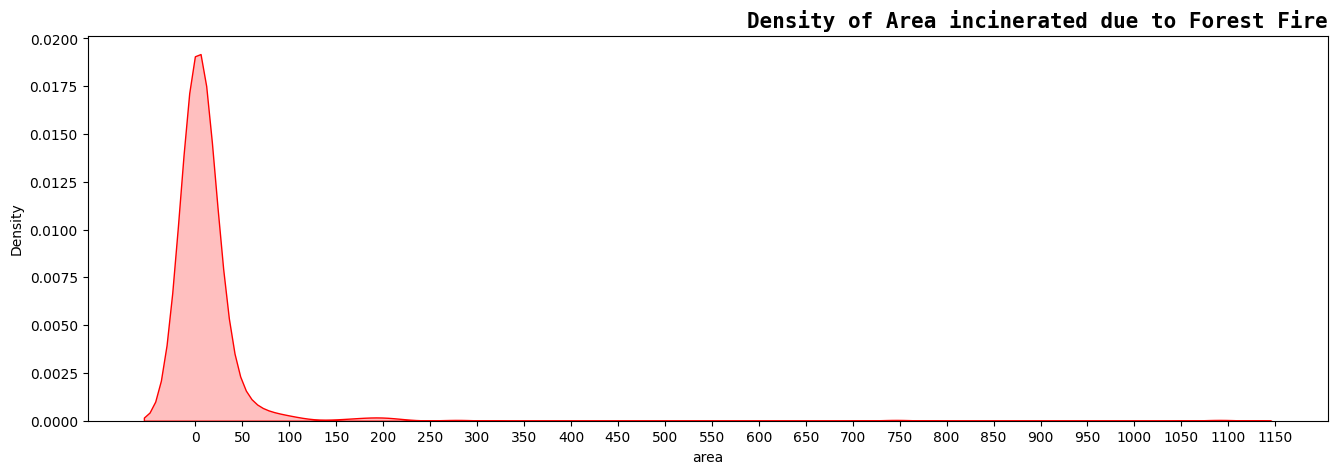

In [13]:
plt.figure(figsize=(16,5))
print("Skewness =",data['area'].skew())
print("Kurtosis =",data['area'].kurtosis())
sns.kdeplot(data['area'],shade=True,color='r')
plt.xticks([i for i in range(0,1200,50)])
plt.title("Density of Area incinerated due to Forest Fire",family='monospace',fontweight='bold',loc='right',fontsize=15)
plt.show()

>***We see that the plot is highly skewed to the left. Area that has burnt due to incidence of forest fires is within 100 ${km}^2$.***

# ***Univariate analysis***

In [14]:
cd=data.iloc[:,2:10] # Continuous Data

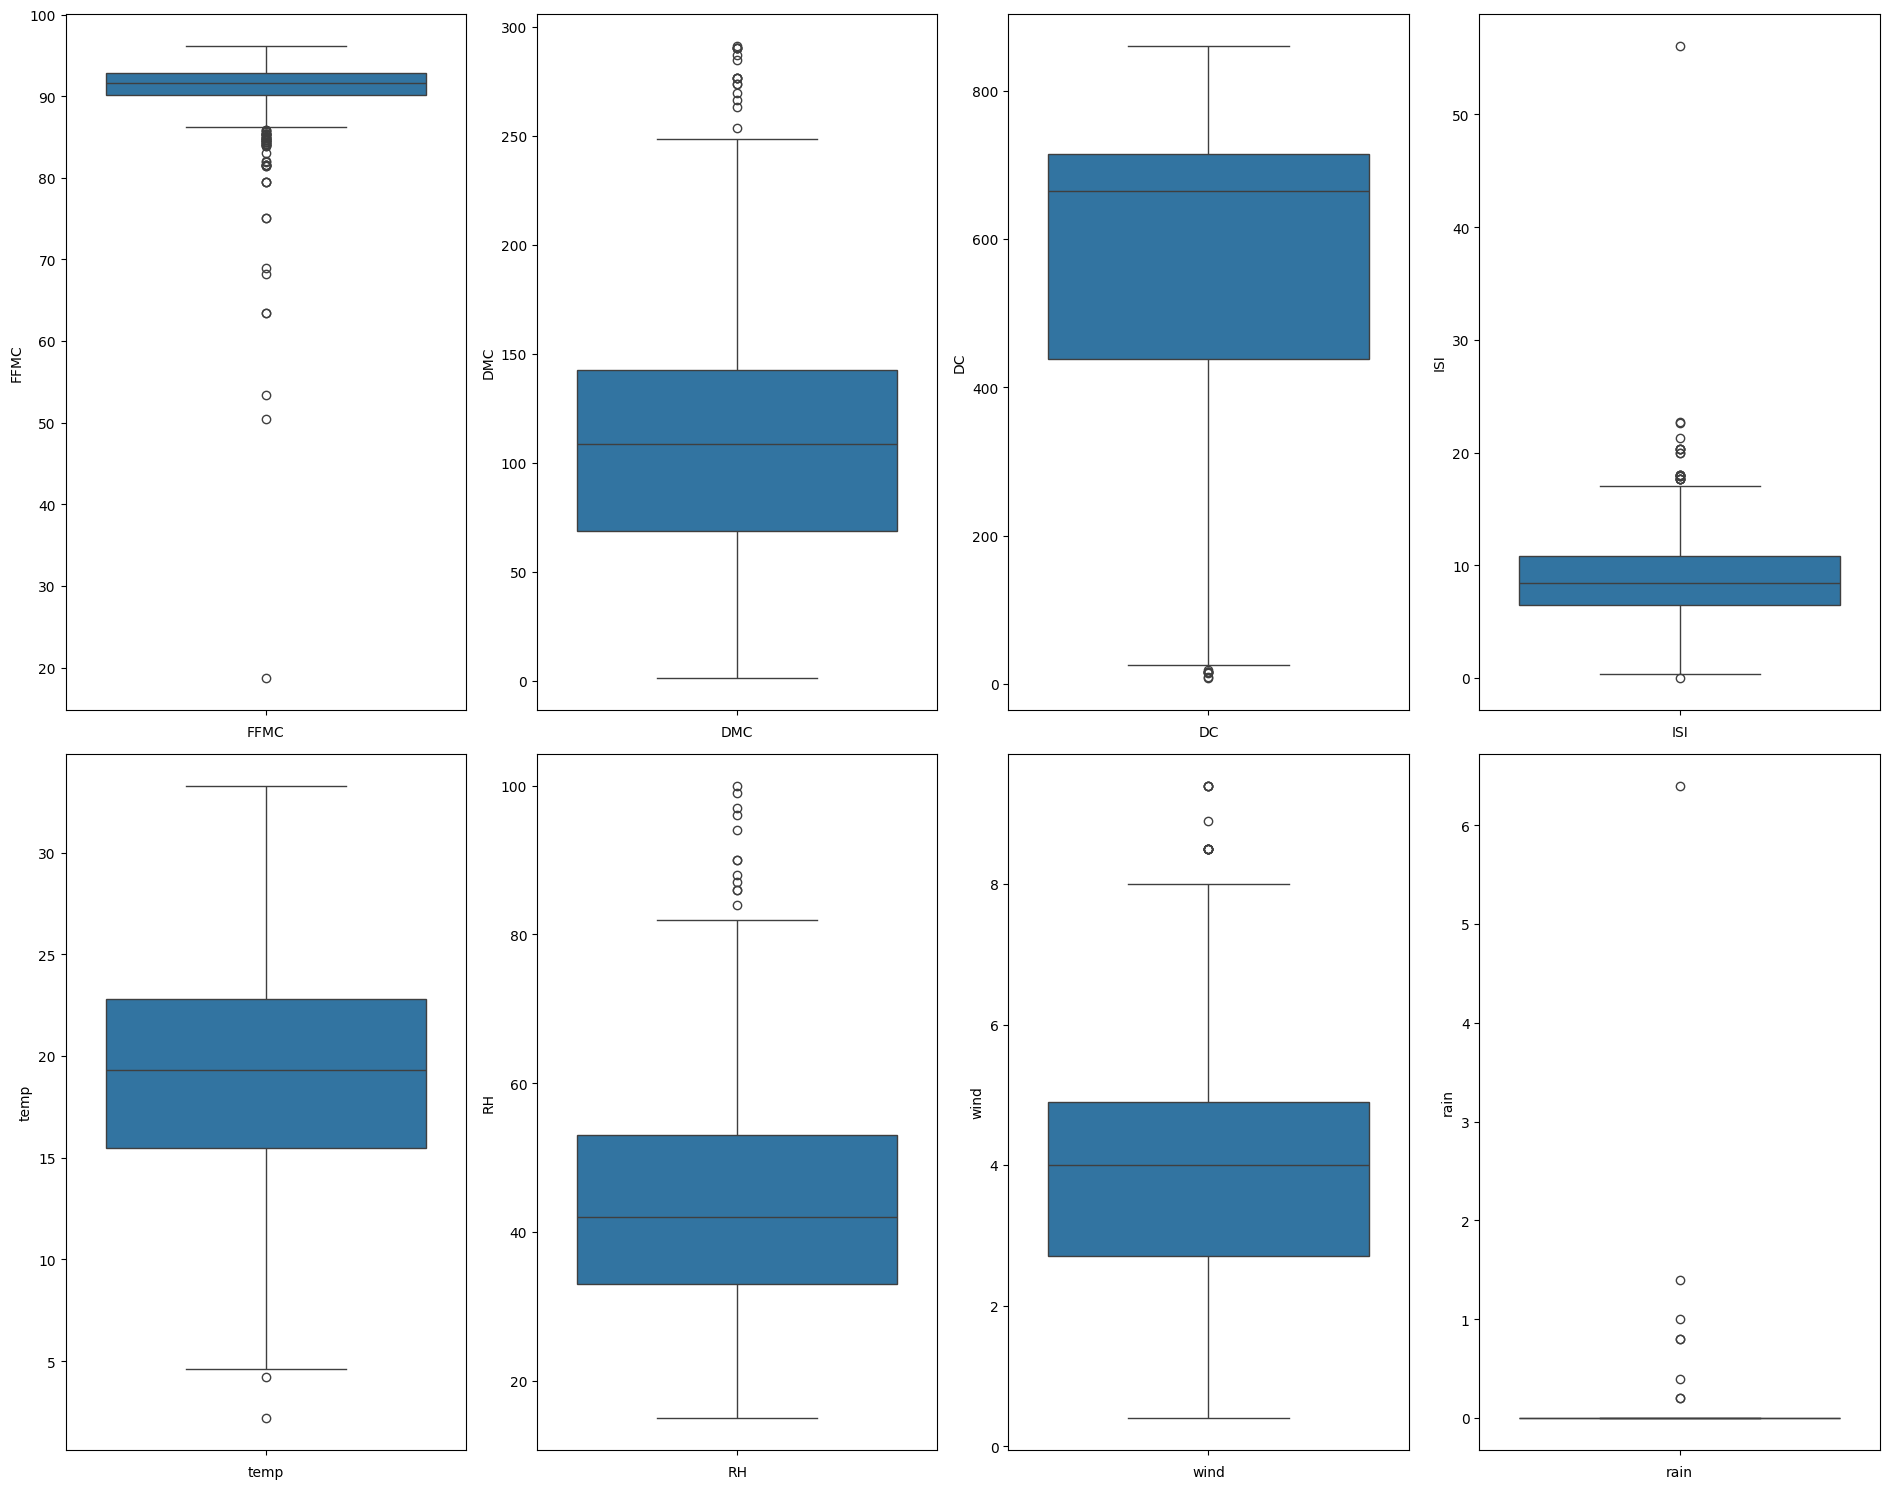

In [15]:
plt.figure(figsize=(19,15))
for i,col in enumerate(cd.columns,1):
  plt.subplot(2,4,i)
  sns.boxplot(cd[col])
  plt.xlabel(col)
plt.tight_layout()
plt.show()

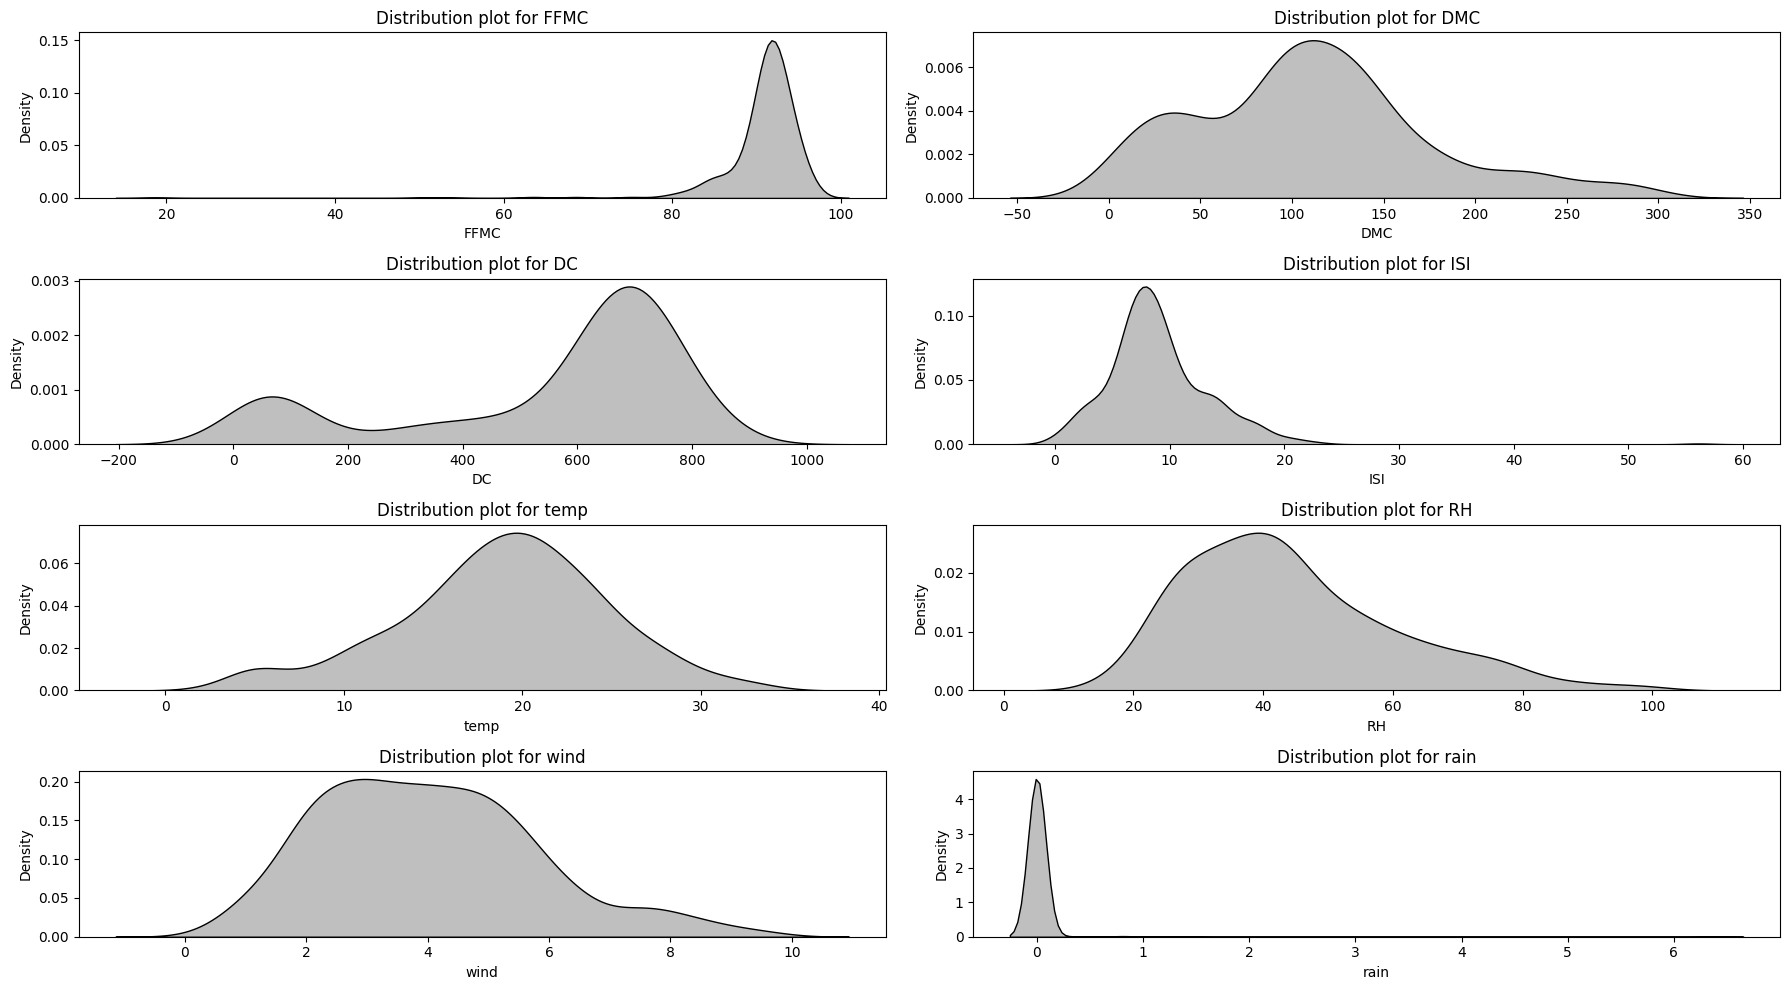

In [16]:
plt.figure(figsize=(18,10))
for i,col in enumerate(cd.columns,1):
  plt.subplot(4,2,i)
  sns.kdeplot(cd[col],color='black',shade=True)
  plt.title("Distribution plot for {}".format(col))
plt.tight_layout()
plt.show()

In [17]:
# One-Hot coding.

le=LabelEncoder()
data['month']=le.fit_transform(data['month'])
data['day']=le.fit_transform(data['day'])

In [ ]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [18]:
data.shape

(517, 31)

In [19]:
data['size_category']=np.where(data['size_category']=='small',0,1)

In [20]:
data.size_category

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [21]:
# Applying train_test_split

x=data.iloc[:,:30]
y=data.iloc[:,30]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [22]:
print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (361, 30)
Shape of x_test (156, 30)
Shape of y_train (361,)
Shape of y_test (156,)


> # **GridSearchCV used for tuning model parameters and selecting the best estimator with optimal score.**



> **The Hyperparameters which are to be tuned are:**

1. Regularization Parameter $C$

2. **$\gamma$ (gamma)**

>> **We also choose the suitable kernel.**

In [23]:
# Performing Hyperparameter tuning.

clf=SVC()
param_grid=[{'kernel':[ 'linear','poly', 'rbf', 'sigmoid'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001]}]
gsv=GridSearchCV(clf,param_grid,cv=10,verbose=0)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}])

In [25]:
gsv.best_params_

{'C': 10, 'gamma': 0.5, 'kernel': 'linear'}

In [26]:
gsv.best_score_

0.9861861861861863

In [27]:
# Evaluating model's performance

clf=SVC(kernel='linear',C=0.1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("The accuracy score is:",accuracy_score(y_test,y_pred))
result1=classification_report(y_test,y_pred)
print("\nClassification Report\n",result1)

The accuracy score is: 0.9743589743589743

Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       119
           1       0.95      0.95      0.95        37

    accuracy                           0.97       156
   macro avg       0.96      0.96      0.96       156
weighted avg       0.97      0.97      0.97       156



In [28]:
print("Confusion Matrix is:\n",confusion_matrix(y_test,y_pred))

Confusion Matrix is:
 [[117   2]
 [  2  35]]


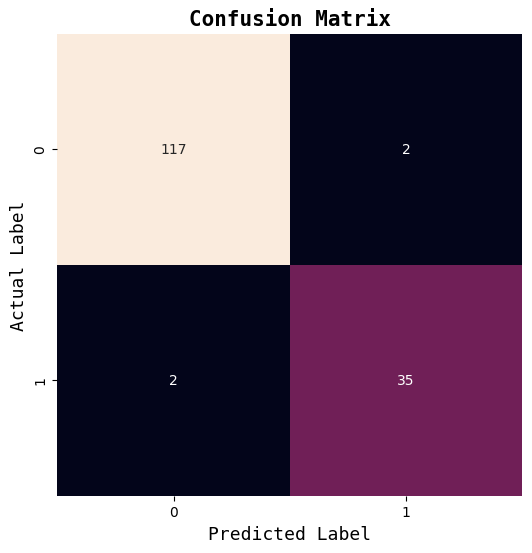

In [29]:
cm=confusion_matrix(y_test,y_pred)
class_labels=[0,1]
df_cm=pd.DataFrame(cm,index=class_labels,columns=class_labels)
plt.figure(figsize=(6,6))
sns.heatmap(df_cm,annot=True,fmt='d',cbar=False)
plt.title("Confusion Matrix",fontsize=15,family='monospace',fontweight='bold')
plt.xlabel('Predicted Label',fontsize=13,family='monospace')
plt.ylabel('Actual Label',fontsize=13,family='monospace')
plt.show()

>>**We can see that the area burnt due to forest fires is predicted correctly.**